# **Linear Regression**: Human Brain Weight 🧠

This dataset was compiled using a medical study conducted on a group of people. This dataset shows a few variations of head sizes and masses of brains, it also consists additional gender and age group columns. The goal of the study is to predict the masses of the brains using the data, and later compare it with the actual masses of brains mentioned in the dataset.

# **Advanced Regression techniques with Scikit-Learn**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Data Preparation </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.1.</b> One-Hot-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.2.</b> Ordinal-Encoding </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.3.</b> Update </span><br>
$\qquad\qquad$ <span style="color:gray"><b>3.4.</b> Split in train and validation </span><br>
$\qquad$ <span style="color:gray"><b>4.</b> Regression with Scikit-Learn </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.1.</b> Training </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.2.</b> Model choice </span><br>
$\qquad\qquad$ <span style="color:gray"><b>4.3.</b> Model evaluation </span><br>

## **0.** Settings

In [4]:
# Libraries
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  
import numpy as np

%matplotlib inline

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.ensemble     import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree         import DecisionTreeRegressor
from sklearn.svm          import SVR, LinearSVR
from catboost             import CatBoostRegressor
from xgboost              import XGBRegressor, XGBRFRegressor

# Warnings off
import warnings
warnings.filterwarnings("ignore")

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------|------------|-------|--------------------------------------------------------------|
    | Name         | Data Type  | Meas. | Description                                                  |
    |--------------|------------|-------|--------------------------------------------------------------|
    | Gender       | nominal    |       | 1 represents Male , 2 represents Female                      |
    | Age Range    | nominal    |       | 1 represents >18 years of age, 2 represents <18 years of age |
    | Head Size    | continuous | cm^3  | Head volume                                                  |
    | Brain Weight | continuous | grams | Mass of brains                                               |
    |--------------|------------|-------|--------------------------------------------------------------|  

'''

In [5]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [7]:
data.columns = ['Gender', 'Age Range', 'Head Size', 'Brain Weight']
data.columns

Index(['Gender', 'Age Range', 'Head Size', 'Brain Weight'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        237 non-null    int64
 1   Age Range     237 non-null    int64
 2   Head Size     237 non-null    int64
 3   Brain Weight  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## **2.** Data Preprocessing

In [9]:
# Null elements
data.isnull().sum()

Gender          0
Age Range       0
Head Size       0
Brain Weight    0
dtype: int64

There are no missing values in this dataset.

## **3.** Data Preparation

In [10]:
X = data[['Gender', 'Age Range', 'Head Size']]
Y = data['Brain Weight']

In [11]:
X.dtypes

Gender       int64
Age Range    int64
Head Size    int64
dtype: object

This is not good, the 'Age Range' and the 'Gender' are not numbers that should be considered as numbers, they are categories and should therefore be dummies-converted. Actually to 'Age Range' we can apply an Ordinal-Encoding (since it makes sense to give growth meaning), while to 'Gender' we apply a One-Hot-Encoder.

### **3.1.** One-Hot-Encoding

In [12]:
## ONE-HOT-ENCODING: 'Gender'

# Encoding
gender_encoded = OneHotEncoder().fit_transform(X[['Gender']]);

# Transform in a DataFrame
gender_encoded = pd.DataFrame(gender_encoded.toarray()).astype(int)

# Show results
gender_encoded.head()

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [13]:
# What is the association?
X['Gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: Gender, dtype: int64

In [14]:
# It is possible to conclude:
#   1 -> Male   -> [1, 0]
#   2 -> Female -> [0, 1]

gender_encoded.columns = ['Male', 'Female']
gender_encoded

,Male,Female
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
232,0,1
233,0,1
234,0,1
235,0,1


### **3.2.** Ordinal-Encoding

In [15]:
## ORDINAL-ENCODING: 'Age Range' 

# Encoding
age_encoded = OrdinalEncoder().fit_transform(X[['Age Range']]);

# Transform in a DataFrame
age_encoded = pd.DataFrame(age_encoded).astype(int)

# Show results
age_encoded.head()

,0
0,0
1,0
2,0
3,0
4,0


In [16]:
# Perform a replacement to have: 0 == <18, 1 == >18
age_encoded = age_encoded.replace({0:1, 1:0})
age_encoded.head()

,0
0,1
1,1
2,1
3,1
4,1


In [17]:
# What is the association?
X['Age Range'].head()

0    1
1    1
2    1
3    1
4    1
Name: Age Range, dtype: int64

In [ ]:
# It is possible to conclude:
#   1 -> >18 -> 1
#   2 -> <18 -> 0

### **3.3.** Update

In [18]:
# Add 'Gender' encoded
X = pd.concat([X, gender_encoded], axis=1)

# Drop the old 'Gender'  
X = X.drop('Gender', axis=1) 

# Substitute 'Age Range' with 'age_encoded'
X['Age Range'] = age_encoded

# Check
X

,Age Range,Head Size,Male,Female
0,1,4512,1,0
1,1,3738,1,0
2,1,4261,1,0
3,1,3777,1,0
4,1,4177,1,0
...,...,...,...,...
232,0,3214,0,1
233,0,3394,0,1
234,0,3233,0,1
235,0,3352,0,1


### **3.4.** Split in train and validation

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(189, 4)
(48, 4)
(189,)
(48,)


## **4.** Regression with **Scikit-Learn**

### **4.1.** Training

In [20]:
# Advanced model definition
models = {
    'Linear'                    : LinearRegression(),
    'Ridge'                     : Ridge(),
    'Lasso'                     : Lasso(),
    'ElasticNet'                : ElasticNet(),
    'KNeighborsRegressor'       : KNeighborsRegressor(),
    'SVR'                       : SVR(),
    'LinearSVR'                 : LinearSVR(),
    'DecisionTreeRegressor'     : DecisionTreeRegressor(),
    'RandomForestRegressor'     : RandomForestRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'AdaBoostRegressor'         : AdaBoostRegressor(),
    'XGBRegressor'              : XGBRegressor(objective='reg:squarederror'),
    'XGBRFRegressor'            : XGBRFRegressor(objective='reg:squarederror'),
    'CatBoostRegressor'         : CatBoostRegressor(verbose=0)
}

In [21]:
def train_models(models, X_train, X_test, Y_train, Y_test):

    np.random.seed(42)

    count_models = 0 

    for name, model in models.items():

        # Training/Fitting
        model.fit(X_train, Y_train)

        # Predictions (on the training set)
        Y_pred_train = model.predict(X_train)
       
        # Metrics
        model_train_score = model.score(X_train, Y_train)
        model_test_score  = model.score(X_test, Y_test)
        model_mse         = mean_squared_error(Y_train, Y_pred_train)
        model_rmse        = np.sqrt(mean_squared_error(Y_train, Y_pred_train))
        model_mae         = mean_absolute_error(Y_train, Y_pred_train)
        model_r2          = r2_score(Y_train, Y_pred_train)

        # If this is the first model trained we create the DataFrame 'results'
        if count_models == 0:
            results = pd.DataFrame([
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2],
                index = ['Train Accuracy', 'Test Accuracy', 'MSE', 'RMSE', 'MAE', 'R2'],
                columns = [name])

        # otherwise we just append the results to the already-existsing DataFrame 'results'
        else:
            results[name] = [
                model_train_score, 
                model_test_score, 
                model_mse, 
                model_rmse, 
                model_mae, 
                model_r2]

        count_models += 1
        
    print(f'Trained {count_models} models')

    return results.T


In [39]:
results = train_models(models, X_train, X_test, Y_train, Y_test)

Trained 14 models


### **4.2.** Model choice

In [40]:
# Overall results
results['Train-Test Accuracy'] = results['Train Accuracy'] - results['Test Accuracy']
results

,Train Accuracy,Test Accuracy,MSE,RMSE,MAE,R2,Train-Test Accuracy
Linear,0.614110,0.776742,5403.786805,73.510454,57.113235,0.614110,-0.162632
Ridge,0.614105,0.776455,5403.858223,73.510939,57.101169,0.614105,-0.162350
Lasso,0.613298,0.770211,5415.164016,73.587798,56.962264,0.613298,-0.156913
ElasticNet,0.608830,0.762208,5477.733661,74.011713,57.154729,0.608830,-0.153378
KNeighborsRegressor,0.684380,0.660024,4419.768677,66.481341,51.960847,0.684380,0.024356
SVR,0.034419,0.040464,13521.465522,116.281837,91.570459,0.034419,-0.006045
LinearSVR,-0.633724,-0.588115,22877.776085,151.254012,128.258052,-0.633724,-0.045610
DecisionTreeRegressor,0.980595,0.498853,271.740741,16.484561,2.571429,0.980595,0.481742
RandomForestRegressor,0.913179,0.625193,1215.787015,34.868138,25.537453,0.913179,0.287986
GradientBoostingRegressor,0.855369,0.665128,2025.335071,45.003723,33.676275,0.855369,0.190241


In [41]:
metrics_to_maximize = ['Train Accuracy', 'Test Accuracy', 'R2']
metrics_to_minimize = ['MSE', 'RMSE', 'MAE', 'Train-Test Accuracy']

print('Metrics to maximize: ')
results[metrics_to_maximize].style.highlight_max(color= 'lightgreen', axis=0)

Metrics to maximize: 


,Train Accuracy,Test Accuracy,R2
Linear,0.614110,0.776742,0.614110
Ridge,0.614105,0.776455,0.614105
Lasso,0.613298,0.770211,0.613298
ElasticNet,0.608830,0.762208,0.608830
KNeighborsRegressor,0.684380,0.660024,0.684380
SVR,0.034419,0.040464,0.034419
LinearSVR,-0.633724,-0.588115,-0.633724
DecisionTreeRegressor,0.980595,0.498853,0.980595
RandomForestRegressor,0.913179,0.625193,0.913179
GradientBoostingRegressor,0.855369,0.665128,0.855369


In [42]:
print('Metrics to minimize: ')
results[metrics_to_minimize].style.highlight_min(color='lightgreen', axis=0)

Metrics to minimize: 


,MSE,RMSE,MAE,Train-Test Accuracy
Linear,5403.786805,73.510454,57.113235,-0.162632
Ridge,5403.858223,73.510939,57.101169,-0.162350
Lasso,5415.164016,73.587798,56.962264,-0.156913
ElasticNet,5477.733661,74.011713,57.154729,-0.153378
KNeighborsRegressor,4419.768677,66.481341,51.960847,0.024356
SVR,13521.465522,116.281837,91.570459,-0.006045
LinearSVR,22877.776085,151.254012,128.258052,-0.045610
DecisionTreeRegressor,271.740741,16.484561,2.571429,0.481742
RandomForestRegressor,1215.787015,34.868138,25.537453,0.287986
GradientBoostingRegressor,2025.335071,45.003723,33.676275,0.190241


### **4.3.** Model evaluation

In [44]:
# Training of the model
model = LinearRegression()
model.fit(X_train, Y_train);

In [45]:
# Coefficients analysis

coefficients = {}

# Save the coefficients
for i in range(len(model.coef_)):
    coefficients[X.columns[i]] = model.coef_[i]

# Add the intercept
coefficients['Intercept'] = model.intercept_

In [46]:
coefficients_dataframe = pd.DataFrame(coefficients.values()).T
coefficients_dataframe.columns = coefficients.keys()
coefficients_dataframe

,Age Range,Head Size,Male,Female,Intercept
0,22.562647,0.242566,7.104745,-7.104745,393.024595


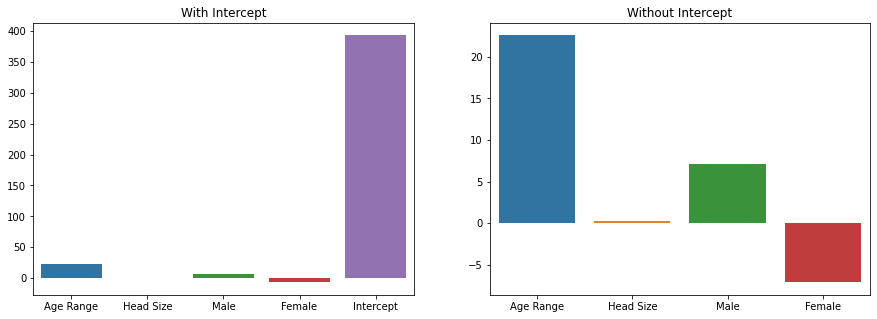

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.barplot(data = coefficients_dataframe);
plt.title('With Intercept');

plt.subplot(1,2,2)
sns.barplot(data = coefficients_dataframe[['Age Range', 'Head Size', 'Male', 'Female']]);
plt.title('Without Intercept');

In [49]:
# Evaluation
Y_pred_train = model.predict(X_train)

# Metrics
r2          = r2_score(Y_train, Y_pred_train)
mae         = mean_absolute_error(Y_train, Y_pred_train)
mse         = mean_squared_error(Y_train, Y_pred_train)
rmse        = np.sqrt(mse)
score_train = model.score(X_train, Y_train)
score_test  = model.score(X_test, Y_test)

print(f'R2 Score: {r2}')
print(f'Training Accuracy: {score_train}')
print(f'Test Accuracy: {score_test}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error: {rmse}')

R2 Score: 0.6141102935912988
Training Accuracy: 0.6141102935912988
Test Accuracy: 0.7767424819420188
Mean Absolute Error: 57.11323529480088
Mean Square Error: 5403.78680464104
Root Mean Square Error: 73.5104537099387
